In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import nltk

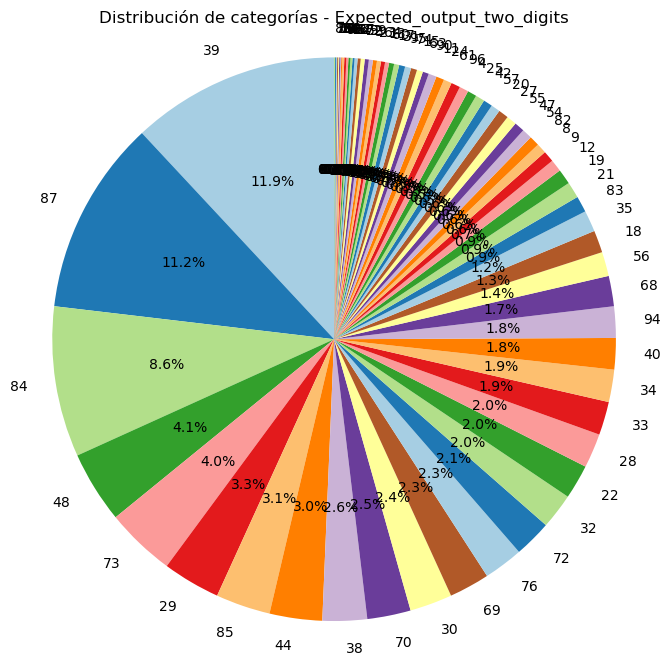

In [2]:
# Cargar el archivo CSV
df = pd.read_csv('Validation_Data.csv')

# Agrupar los datos por la columna Expected_output_two_digits y contar las ocurrencias
category_counts = df['Expected_output_two_digits'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Agregar un título
plt.title('Distribución de categorías - Expected_output_two_digits')

# Mostrar el gráfico
plt.axis('equal')  # Para asegurar que el gráfico de pastel sea circular
plt.show()

In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Función para normalizar el texto
def normalize_text(text):
    if isinstance(text, str):  # Verificar si el texto es una cadena
        # Convertir a minúsculas
        text = text.lower()
        # Eliminar números
        text = re.sub(r'\d+', '', text)
        # Eliminar puntuación
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Eliminar espacios extra
        text = text.strip()
        # Tokenización
        tokens = word_tokenize(text)
        # Eliminar stopwords (palabras vacías)
        stop_words = set(stopwords.words('spanish'))  # Cambia a 'english' si los datos están en inglés
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    else:
        return []  # Devolver una lista vacía si no es un string

# Cargar el archivo CSV
df = pd.read_csv('Validation_Data.csv')

# Aplicar la normalización a la columna Validation_input
df['Normalized_input'] = df['Validation_input'].apply(normalize_text)

# Entrenar el modelo Word2Vec con los datos normalizados
sentences = df['Normalized_input'].tolist()  # Lista de oraciones tokenizadas
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

first_word = model.wv.index_to_key[0]  # Acceder al primer key
# Ejemplo de cómo obtener el vector de una palabra
vector = model.wv[first_word]  # Cambia 'ejemplo' por cualquier palabra que te interese

# Asociar las etiquetas de salida (Expected_output_four_digits)
output_labels = df['Expected_output_four_digits'].tolist()

# Visualizar algunos vectores de palabras
print(f"Vector de 'ejemplo': {vector}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\os190\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\os190\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\os190\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Vector de 'ejemplo': [-0.14384265  0.42421627  0.04541131  0.01929266  0.09223487 -0.56130147
  0.13957024  0.65166926 -0.28452128 -0.30591416 -0.13780342 -0.7057237
 -0.07976119  0.15586498  0.10694226 -0.20845416  0.01860194 -0.3975898
  0.025333   -0.8258874   0.20124249  0.19163178  0.17956965 -0.30311367
 -0.09521035 -0.00196492 -0.25216243 -0.24573411 -0.09503509 -0.02727458
  0.36220628  0.04076198  0.1752949  -0.1541494  -0.10882884  0.41184106
  0.04886898 -0.40947747 -0.12804233 -0.74582696  0.0430402  -0.3735712
 -0.03206138  0.06892296  0.3075917  -0.1480069  -0.28847465 -0.04530708
  0.20599034  0.27620134  0.12949723 -0.30018982 -0.02098393  0.02534433
 -0.19606769  0.22950497  0.14583005 -0.08860669 -0.4364747   0.0851487
  0.12691157  0.13995025 -0.07063869  0.09241851 -0.45601922  0.4147877
  0.1077626   0.25045696 -0.52274877  0.44767562 -0.2041461   0.13245293
  0.41000947 -0.1858521   0.3485536   0.13593972  0.06279901 -0.11157785
 -0.26450944  0.2253759  -0.1420581